In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets  import make_moons

In [3]:
X,y = make_moons(n_samples=1000,noise=0.40)

In [4]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [ ]:
from  sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy')

In [ ]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.75

In [ ]:
# we are going to use bagging method

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=100,bootstrap= True,max_samples=100,n_jobs=-1)

In [ ]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [ ]:
y_pred = bag_clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.835

In [ ]:
# pagging 

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=100,bootstrap= False,max_samples=100,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.835

In [ ]:
# oob(out of bag)instance

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=100,bootstrap= True,max_samples=100,n_jobs=-1
                           ,oob_score=True)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.825

In [ ]:
# we have study many classifiers so we are going to use votingclassifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# first we have to all clasifcation  alogrithm to call
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr = LogisticRegression()
svc  = SVC(random_state=42)
tree = DecisionTreeClassifier(random_state= 42)
forest = RandomForestClassifier(random_state=42)
vote_clf =VotingClassifier(estimators=[('lr',lr),('svc',svc),('tree',tree),('forest',forest)],).fit(X_train,y_train)

In [ ]:
y_pred = vote_clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8

In [ ]:
vote_clf.score(X_test,y_test)

0.8

In [ ]:
from sklearn.metrics import plot_confusion_matrix
for clf in (lr,svc,tree,forest,vote_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.805
SVC 0.84
DecisionTreeClassifier 0.785
RandomForestClassifier 0.795
VotingClassifier 0.8


LogisticRegression 0.805
SVC 0.84
DecisionTreeClassifier 0.785
RandomForestClassifier 0.795
VotingClassifier 0.8


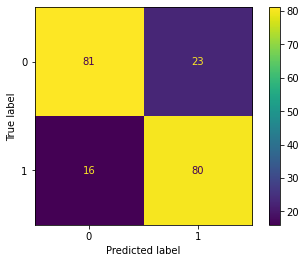

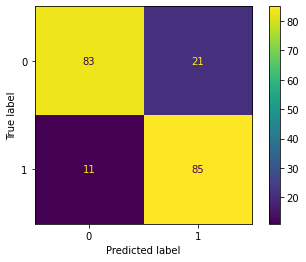

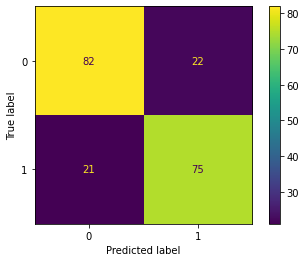

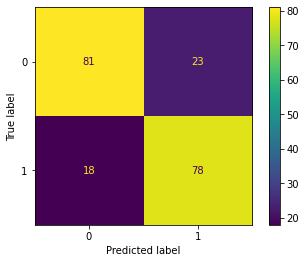

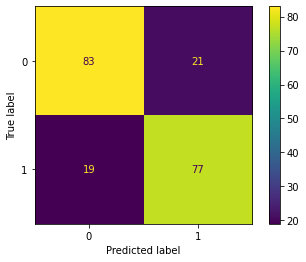

In [ ]:
from sklearn.metrics import plot_confusion_matrix
for clf in (lr,svc,tree,forest,vote_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
    print(plot_confusion_matrix(clf,X_test,y_test))

In [ ]:
forest.feature_importances_

array([0.43719572, 0.56280428])

In [ ]:
#boosting
# adaboost and gradientbosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_boost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=200,random_state=42)

In [ ]:
ada_boost_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
ada_boost_clf.score(X_test,y_test)

0.85

In [ ]:
ada_boost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,criterion='entropy'),n_estimators=200,random_state=42)

In [ ]:
ada_boost_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [ ]:
ada_boost_clf.score(X_test,y_test)

0.845